# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
soup.find('tr', class_='data-row')


<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in soup.find_all('tr', class_='data-row'):
    new_row = [data.text for data in row.find_all('td')]
    mars_data.append(new_row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int')
mars_df['ls'] = mars_df['ls'].astype('int')
mars_df['month'] = mars_df['month'].astype('int')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
print(mars_df['month'].nunique())

12


In [13]:
# 2. How many Martian days' worth of data are there?
print(mars_df['sol'].nunique())

1867


In [14]:
# 3. What is the average low temperature by month?

monthly_temp = mars_df.groupby('month')['min_temp'].mean().to_frame()
print(monthly_temp)

        min_temp
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


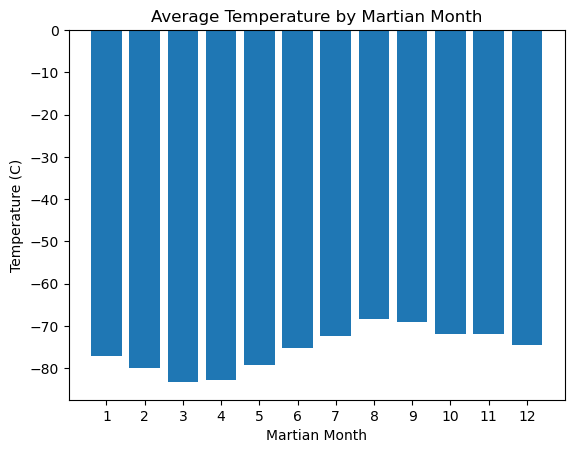

In [15]:
# Plot the average temperature by month

plt.bar(monthly_temp.index, monthly_temp['min_temp'])
plt.xticks(ticks=monthly_temp.index)
plt.xlabel('Martian Month')
plt.ylabel('Temperature (C)')
plt.title('Average Temperature by Martian Month')
plt.savefig('Visuals/temp_by_month.png')

The coldest month on Mars is month No. 3
The hottest month on Mars is month No. 8


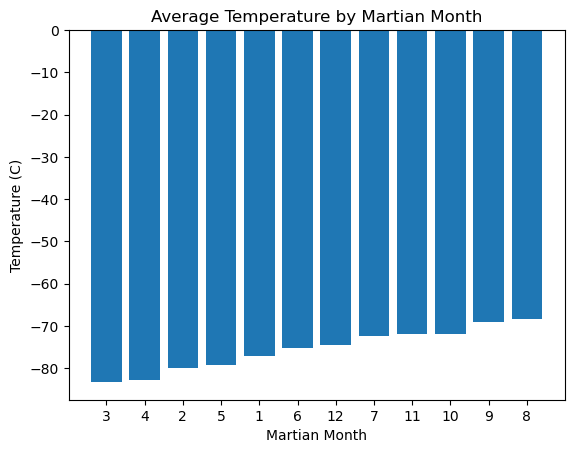

In [16]:
# Identify the coldest and hottest months in Curiosity's location
monthly_temp_sorted = monthly_temp.sort_values('min_temp')
sorted_months = monthly_temp_sorted.index.values.tolist()

plt.bar(sorted(monthly_temp_sorted.index), monthly_temp_sorted['min_temp'])
plt.xticks(ticks=sorted(monthly_temp_sorted.index), labels=sorted_months)
plt.xlabel('Martian Month')
plt.ylabel('Temperature (C)')
plt.title('Average Temperature by Martian Month')
plt.savefig('Visuals/temp_by_month_sorted.png')

print(f"The coldest month on Mars is month No. {monthly_temp_sorted[monthly_temp_sorted['min_temp'] == monthly_temp_sorted['min_temp'].min()].index[0]}")
print(f"The hottest month on Mars is month No. {monthly_temp_sorted[monthly_temp_sorted['min_temp'] == monthly_temp_sorted['min_temp'].max()].index[0]}")

In [17]:
# 4. Average pressure by Martian month
monthly_pressure = mars_df.groupby('month')['pressure'].mean().to_frame()

The month on Mars with the lowest average pressure is month No. 6
The month on Mars with the highest average pressure is month No. 9


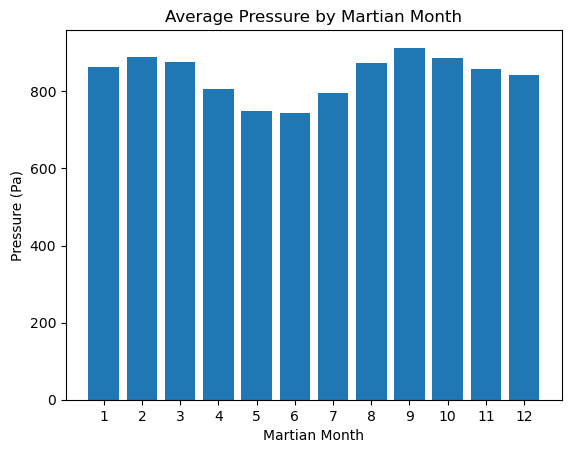

In [18]:
# Plot the average pressure by month
plt.bar(monthly_pressure.index, monthly_pressure['pressure'])
plt.xticks(ticks=monthly_temp.index)
plt.xlabel('Martian Month')
plt.ylabel('Pressure (Pa)')
plt.title('Average Pressure by Martian Month')
plt.savefig('Visuals/temp_by_pressure.png')

print(f"The month on Mars with the lowest average pressure is month No. {monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].min()].index[0]}")
print(f"The month on Mars with the highest average pressure is month No. {monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].max()].index[0]}")

Earth days in dataset: 2021
Earth days in a year: 365.25
Earth years in the dataset: 5.53
Number of elapsed days on mars (sols) in dataset: 1968
Number of Mars days (sols) days in single Mars year in dataset: 668
Mars years in the dataset: 2.94
---------------
Number of elapsed Earth days between a single Mars year in dataset: 687
Number of elapsed Earth days in a single Mars year based on total years in dataset: 687.02


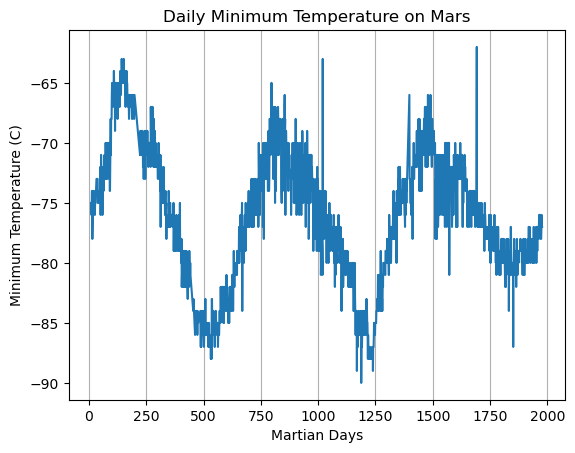

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Visualization of all data points
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.grid(axis='x')
plt.xlabel('Martian Days')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature on Mars')
plt.savefig('Visuals/all_data.png')

# This finds the latest and earliest Earth Dates in the dataset to find the number of elapsed days
print(f"Earth days in dataset: {(mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days}")
print(f"Earth days in a year: 365.25")

# This finds the number of years in the dataset and stores that variable
print(f"Earth years in the dataset: {round((mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days/365.25, 2)}")
earth_years = round((mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days/365.25, 2)

# This for loop uses the provided dataset to fetch the Earth Date on the first day of the Mars new year, then find the next
# first day of the next Mars year and store the Earth Date. 
# This is an exact calculation of the Earth days in a Mars year. It also stores the elapsed Mars days (sols) in 
# that same timeframe to calculate the Mars year in sols.
year_start = False
new_year = False
for index, row in mars_df.iterrows():
    current_month = mars_df.loc[index, 'month']
    if (year_start == False) & (new_year == False) & (current_month == 1):
        year_start = True
        start_date = mars_df.loc[index, 'terrestrial_date']
        sol_start = mars_df.loc[index, 'sol']
    if (year_start == True) & (new_year == False) & (current_month == 2):
        new_year = True
    if (year_start == True) & (new_year == True) & (current_month == 1):
        end_date = mars_df.loc[(index), 'terrestrial_date']
        sol_end = mars_df.loc[index, 'sol']
        break

# The number of sols in the entire dataset can be found by taking difference of the first and last readings.
print(f"Number of elapsed days on mars (sols) in dataset: {mars_df['sol'].max() - mars_df['sol'].min() + 1}")   

# The number of sols in a Mars year can be found using the stored data from the for loop above
print(f"Number of Mars days (sols) days in single Mars year in dataset: {(abs(sol_start - sol_end))}")

# The number of years in the dataset is found by dividing the above two findings. It is stored as a variable.
print(f"Mars years in the dataset: {round((mars_df['sol'].max() - mars_df['sol'].min()) / abs(sol_start - sol_end), 2)}")
mars_years = round((mars_df['sol'].max() - mars_df['sol'].min()) / abs(sol_start - sol_end), 2)

print('-'*15)
# The first estimation is from the for loop using the exact dates of the start and end of the Mars year
print(f"Number of elapsed Earth days between a single Mars year in dataset: {(abs(start_date - end_date)).days}")

# The second estimation is found by using the ratio of Earth years to Mars years in the dataset and multiplying by days in a year
print(f"Number of elapsed Earth days in a single Mars year based on total years in dataset: {round(earth_years/mars_years*365.25, 2)}")



## Answers

1. How many months exist on Mars?
   There are 12 months in a Martian year based on the dataset provided.
   
    
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
   There are 1,867 data points recorded in the data across 1,968 total elapsed days.
   
    
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
   The coldest month is month No. 3, with an average temperature of -83 C. 
   The "warmest" month is month No. 8 with an average of -68 C.
   
   
4. Which months have the lowest and the highest atmospheric pressure on Mars? 
   The month with the lowest average pressure is month No. 6 with an average of 745 pascals.
   The month with the highest average pressure is month No. 9 with an average of 913 pascals.
   

5. About how many terrestrial (Earth) days exist in a Martian year? 
   Based on two different methods of finding the elapsed days in the dataset, the Mars year should be approximately 687 Earth      days. Using the chart to visually estimate between peak temperatures, it looks like 815 to about 1,470 on the x-axis between
   peaks, which would be 655 days. And from about 130 to about 815 for another, which would be 685 days. The visual estimate
   average of those is 670 days. Though the visual estimation is unneccessary since there are tools to make an exact
   calculation from the dataset.
   


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
mars_df.to_csv('Data/mars_data.csv')

In [41]:
browser.quit()